# Bayes Classification
Bayes classification is a probabilistic machine learning algorithm used for classification tasks. It is based on Bayes' theorem, which describes the probability of an event, based on prior knowledge of conditions that might be related to the event.

The basic idea behind Bayes classification is to estimate the probability of a given class label (or target variable) based on the observed features (or input variables) of a data point. Mathematically, this can be expressed as:
$$P(y | X) = \frac{P(X | y) \cdot P(y)}{P(X)}  \;  \Rightarrow  \;  p_k(x) = \frac{f_k(x) \cdot \pi_k}{\sum_{i=1}^K f_i(x) \pi_i}$$
Where:
- $ P(y | X) $ is the posterior probability of class $ y $ given the observed features $ X $.
- $ P(X | y) $ is the likelihood of observing the features given class $ y $.
- $ P(y) $ is the prior probability of class $ y $.
- $ P(X) $ is the evidence, which is the probability of observing the features.

Is there any advantage over the logirstic regression approach?
- The logistic regression model is unstable when classes are substantially separated. We don't have this problem with these methods.
- These methods might be more accurate than logistic regression if the sample size is small, especially when the distribution of the predictors X is approximately normal in each class.
- Applying these methods to a scenario with more than two classes is straightforward.

Estimating $\pi_k$ is easy if we have a random sample from the population. We simply compute the fraction of the training observations that belong to the $𝑘^{th}$ class. However , estimating the density function $f_k(x)$ is much more challenging. So we typically have to make some simplifying assumptions. Different estimates to approxiamte Bayes classifier:
- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- Gaussian Naive Bayes (GNB)

In [1]:
import numpy as np
from sklearn.datasets import make_circles
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

## Define Functions

In [2]:
# define a function to generate sample data for two features
# with specified mean vectors and covariance matrices

def sample_generator(mean0, mean1, cov0, cov1, n):
    """
    Inputs:
        mean0: the mean vector for class 0
        mean1: the mean vector for class 1
        cov0: cov matrix for class 0
        cov1: cov matrix for class 1
        n: number of samples in each class
        
    Outputs:
        X: Feature matrix where each row represents a training
           example and each column represents a feature
        y: Target vector containing the class labels for the training examples
    """
    
    # Generate samples for each class with the specified covariance matrix
    class0_samples = np.random.multivariate_normal(mean0, cov0, n)
    class1_samples = np.random.multivariate_normal(mean1, cov1, n)

    # Create the feature matrix X and the target vector y
    X = np.vstack([class0_samples, class1_samples])
    y = np.hstack([np.zeros(n), np.ones(n)])  # Assign class labels (0 and 1)

    # Shuffle the data
    shuffle_idx = np.random.permutation(len(X))
    X = X[shuffle_idx]
    y = y[shuffle_idx]
    
    return X, y

In [3]:
# define a function for visualizing data points

def plotData(X, y):
    """
    Inputs:
        X: Feature matrix where each row represents a training
           example and each column represents a feature
        y: Target vector containing the class labels for the training examples
        
    Output:
        Scatter plot showing the distribution of data points for each class
        in a two-dimensional feature space
    """
    
    # identify the indices of data points belonging to each class
    class0 = y == 0
    class1 = y == 1

    plt.scatter(X[class0, 0], X[class0, 1], color='r', marker='x', label='class0')
    plt.scatter(X[class1, 0], X[class1, 1], color='b', marker='o', label='class1')

    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend(loc='lower right')

In [4]:
# define a function for visualizing decision boundaries

def plotDB(X, model):
    """
    Inputs:
        X: Feature matrix where each row represents a training
           example and each column represents a feature.
        model: Trained classification model   
        
    Output:
        Visualization showing decision boundaries and decision regions
        of the classification model in a two-dimensional feature space.    
    """
    
    u_min, u_max = X[:, 0].min(), X[:, 0].max()
    v_min, v_max = X[:, 1].min(), X[:, 1].max()
    
    # create a grid of points (xx, yy) covering the entire feature space
    U, V = np.meshgrid(np.arange(u_min, u_max, .02),
                       np.arange(v_min, v_max, .02))
    Z = model.predict_proba(np.c_[np.ravel(U), np.ravel(V)])
    
    V = V.reshape(U.shape)
    Z = Z[:,1].reshape(U.shape)
    
  
    # create a contour plot of the decision boundary `Z` on the space defined by `U` and `V`
    # draw the decision boundary where the predicted values are equal to 0.5
    plt.contour(U, V, Z, levels=[.5], linewidths=2, colors='k')

In [5]:
# define a fucntion to evaluate the performance of a machine learning model

def ModelPerformance(model, X, y):
    """
    Inputs:
        model: The trained machine learning model
        X: Feature matrix where each row represents a training
           example and each column represents a feature
        y: Target vector containing the class labels for the training examples
    """
    score = model.score(X, y)
    print('\033[1m' + 'The mean accuracy:' + '\033[0m')
    print('%.4f \n' %score)

    pred = model.predict(X)
    print('\033[1m' + 'Confusion matrix:' + '\033[0m')
    print(confusion_matrix(y, pred))

In [6]:
# define a function to plot train and test data as subplots

def plotdata(model, X_train, y_train, X_test, y_test):
    """
    Inputs:
        model: The trained machine learning model
        X_train: The feature matrix of the training dataset
        y_train: The target vector of the training dataset
        X_test: The feature matrix of the testing dataset
        y_test: The target vector of the testing dataset    
    """
    # calculates the accuracy score of the model on train and test dataset
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    
    minX1 = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
    minX2 = min(np.min(X_train[:,1]), np.min(X_test[:,1]))

    maxX1 = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
    maxX2 = max(np.max(X_train[:,1]), np.max(X_test[:,1]))
    
    plt.figure(figsize=(12,5))
    
    plt.subplot(1,2,1) # plot train data
    plotDB(X_train, model)
    plotData(X_train, y_train)
    plt.title('Train data, score = %.2f' %score_train, fontsize=14)
    plt.xlim(minX1-.5, maxX1+.5)
    plt.ylim(minX2-.5, maxX2+.5)
    
    plt.subplot(1,2,2) # plot train data
    plotDB(X_train, model)
    plotData(X_test, y_test)
    plt.title('Test data, score = %.2f' %score_test, fontsize=14)
    plt.xlim(minX1-.5, maxX1+.5)
    plt.ylim(minX2-.5, maxX2+.5)
    
    plt.show()

In this file, we will generate three datasets with different covariance matrix.

- The classes in the first dataset have different mean vectors but the covariance matrix across classes is the same.

$$\begin{bmatrix} X_1 \\ X_2 \end{bmatrix} | \;(y = 0) \sim N\left(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 6 & 4 \\ 4 & 9 \end{bmatrix}\right)$$

$$\begin{bmatrix} X_1 \\ X_2 \end{bmatrix} | \;(y = 1) \sim N\left(\begin{bmatrix} 7 \\ 7 \end{bmatrix}, \begin{bmatrix} 6 & 4 \\ 4 & 9 \end{bmatrix}\right)$$

- The classes in the scond dataset have different mean vectors and different covariance matrix across classes.

$$\begin{bmatrix} X_1 \\ X_2 \end{bmatrix} | \;(y = 0) \sim N\left(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 6 & 4 \\ 4 & 9 \end{bmatrix}\right)$$

$$\begin{bmatrix} X_1 \\ X_2 \end{bmatrix} | \;(y = 1) \sim N\left(\begin{bmatrix} 7 \\ 7 \end{bmatrix}, \begin{bmatrix} 8 & -3 \\ -3 & 4 \end{bmatrix}\right)$$

- The classes in the third dataset have different mean vectors and different feature variances, but features are independet (uncorrelated) meaning the covariance equals to zero.

$$\begin{bmatrix} X_1 \\ X_2 \end{bmatrix} | \;(y = 0) \sim N\left(\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 6 & 0 \\ 0 & 9 \end{bmatrix}\right)$$

$$\begin{bmatrix} X_1 \\ X_2 \end{bmatrix} | \;(y = 1) \sim N\left(\begin{bmatrix} 7 \\ 7 \end{bmatrix}, \begin{bmatrix} 8 & 0 \\ 0 & 4 \end{bmatrix}\right)$$

In [7]:
X1, y1 = sample_generator([0, 0], [7, 7], [[6, 4], [4, 9]], [[6, 4], [4, 9]], 200)
X2, y2 = sample_generator([0, 0], [7, 7], [[6, 5], [5, 9]], [[8, -3], [-3, 4]], 200)
X3, y3 = sample_generator([0, 0], [7, 7], [[6, 0], [0, 9]], [[8, 0], [0, 4]], 200)

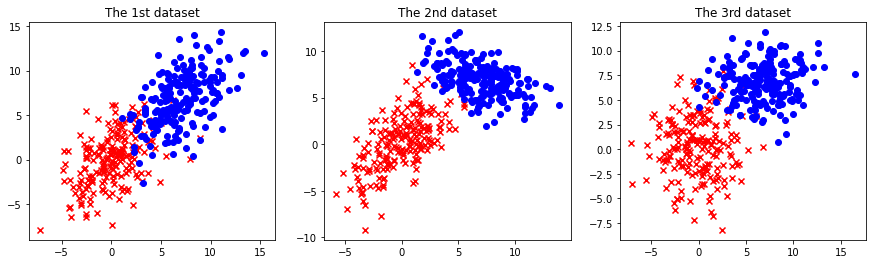

In [8]:
# let's visualize the three datasets
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(X1[y1 == 0, 0], X1[y1 == 0, 1], color='r', marker='x', label='class0')
plt.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], color='b', marker='o', label='class1')
plt.title('The 1st dataset')

plt.subplot(1,3,2)
plt.scatter(X2[y2 == 0, 0], X2[y2 == 0, 1], color='r', marker='x', label='class0')
plt.scatter(X2[y2 == 1, 0], X2[y2 == 1, 1], color='b', marker='o', label='class1')
plt.title('The 2nd dataset')

plt.subplot(1,3,3)
plt.scatter(X3[y3 == 0, 0], X3[y3 == 0, 1], color='r', marker='x', label='class0')
plt.scatter(X3[y3 == 1, 0], X3[y3 == 1, 1], color='b', marker='o', label='class1')
plt.title('The 3rd dataset')

plt.show()

## Linear Discriminant Analysis (LDA)
LDA is a generative model that assumes the features are normally distributed within each class. It estimates the parameters (mean and covariance) of the Gaussian distributions for each class and uses Bayes' theorem to compute the posterior probability. However, LDA further assumes that all classes share the same covariance matrix, resulting in linear decision boundaries. Here is how LDA works:

- Estimate the class statitsits
    - LDA estimates the mean vector $\boldsymbol{\mu}_k$ for each class $k$, which represents the average values of the features for class $k$
    - LDA estimates the covariance matrix of the features $\boldsymbol{\Sigma}$, which is a shared variance term across all $K$ classes.<br><br>
    
- Compute Class Priors
    - LDA also computes the prior probability $\pi_k$ for each class, which represents the probability of observing class $k$ in the training data. <br><br>

- Compute Discriminant Functions to compute the likelihood of each class given an observation
    - Using the estimated class statistics and priors, LDA computes discriminant functions for each class. The discriminant function for class $k$ is given by
$$ \delta_k(x) = x^T \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}_k - \frac{1}{2} \boldsymbol{\mu}_k^T \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}_k + \log \pi_k $$
    Where $x$ is the input observation, $\boldsymbol{\Sigma}^{-1}$ is the inverse of the covariance matrix, $\boldsymbol{\mu}_k$ is the mean vector for class $k$, and $\pi_k$ is the prior probability of class $k$.
    The decision boundary between classes is linear in the feature space and is determined by the discriminant functions.<br><br>

- Prediction
    - Given a new observation $x$, LDA computes the discriminant function for each class and assigns the observation to the class with the highest discriminant score.


In [9]:
# let's first split data into training and test data sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25)

In [10]:
lda = LinearDiscriminantAnalysis()      # create an instance of an LDA model
lda_model = lda.fit(X1_train, y1_train) # fit the model to the training data

In [11]:
ModelPerformance(lda_model, X1_test, y1_test)

The mean accuracy:
0.9300 

Confusion matrix:
[[42  1]
 [ 6 51]]


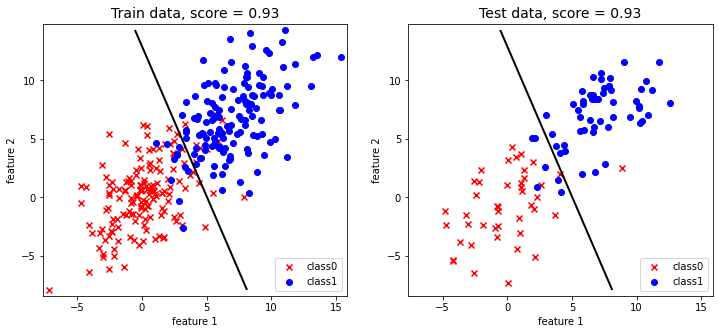

In [12]:
plotdata(lda_model, X1_train, y1_train, X1_test, y1_test)

## Quadratic Discriminant Analysis (QDA)

Quadratic Discriminant Analysis (QDA) is a classification algorithm, like LDA, that models the distribution of the features within each class. However, unlike LDA, QDA does not assume that all classes share the same covariance matrix. Instead, QDA estimates a separate covariance matrix for each class. Here's how QDA works:

- Estimate the class statitsits
    - QDA estimates the mean vector $\boldsymbol{\mu}_k$ for each class $k$, which represents the average values of the features for class $k$
    - QDA estimates the covariance matrix of the features $\boldsymbol{\Sigma}_k$, which is the spread and correlation of the features within class $k$.<br><br>
    
- Compute Class Priors
    - QDA also computes the prior probability $\pi_k$ for each class, which represents the probability of observing class $k$ in the training data. <br><br>

- Compute Discriminant Functions to compute the likelihood of each class given an observation
    - Using the estimated class statistics and priors, QDA computes discriminant functions for each class. The discriminant function for class $k$ is given by
$$ \delta_k(\mathbf{x}) = -\frac{1}{2} \log |\boldsymbol{\Sigma}_k| - \frac{1}{2} (\mathbf{x} - \boldsymbol{\mu}_k)^T \boldsymbol{\Sigma}_k^{-1} (\mathbf{x} - \boldsymbol{\mu}_k) + \log \pi_k  $$
    Where $x$ is the input observation, $|\boldsymbol{\Sigma}|$ is the determinant of the covariance matrix, $\boldsymbol{\Sigma}_k^{-1}$ is the inverse of the covariance matrix, $\boldsymbol{\mu}_k$ is the mean vector for class $k$, and $\pi_k$ is the prior probability of class $k$.
    The decision boundary between classes is quadratic in the feature space and is determined by the discriminant functions.<br><br>

- Prediction
    - Given a new observation $x$, QDA computes the discriminant function for each class and assigns the observation to the class with the highest discriminant score.


In [13]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)

In [14]:
qda = QuadraticDiscriminantAnalysis()    # create an instance of an QDA model
qda_model = qda.fit(X2_train, y2_train)  # fit the model to the training data

In [15]:
ModelPerformance(qda_model, X2_test, y2_test)

The mean accuracy:
0.9800 

Confusion matrix:
[[54  2]
 [ 0 44]]


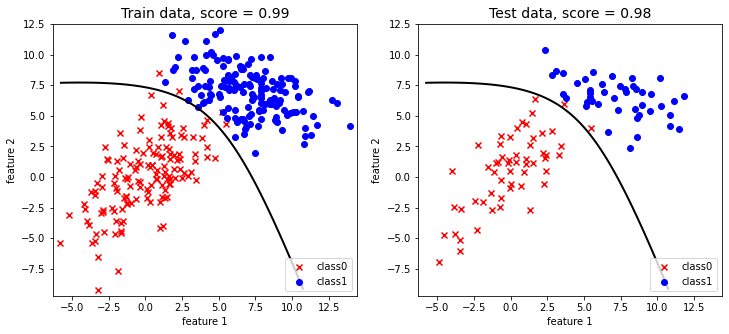

In [16]:
plotdata(qda_model, X2_train, y2_train, X2_test, y2_test)

## Gaussian Naive Bayes (GNB)

Gaussian Naive Bayes (GNB) is a variant of the Naive Bayes algorithm that is well-suited for classification tasks where the features are continuous and assumed to follow a Gaussian (normal) distribution within each class. GNB assumes that the features within each class are independent and follow a Gaussian distribution (the likelihood of observing a particular feature value given the class label follows a normal distribution). The assumption that features are independent within each class means that for $k=1,\ldots,K$,

$$ f_k(x) = f_{k1}(x_1) \times f_{k2}(x_2) \times \ldots \times f_{kp}(x_p) $$

where $f_{kj}$ is the density function of the jth feature (predictor) among observations in the $k^\text{th}$ class.

The assumption that the features are independent within each class is not always true, but even though this modeling assumption is made for convenience, it often leads to pretty decent results, especially in settings where number of samples is not large enough relative to number of features to effectively estimate the joint distribution of the predictors within each class.
Naive Bayes assumption introduces some bias, but reduces variance, leading to a classifier that works quite well in practice as a result of the bias-variance trade-off.

Here's how GNB works:

- Estimate the class statitsits
    - GNB estimates the mean vector $\boldsymbol{\mu}_k$ for each class $k$, which represents the average values of the features for class $k$
    - GNB estimates the variance vector $\boldsymbol{\sigma}_k$, which is the spread of the features within class $k$.<br><br>
    
- Compute Class Priors and Likelihoods
    - GNB calculates the prior probability $\pi_k$ for each class, which represents the probability of observing class $k$ in the training data. 
    - The likelihood $f_k(x)$ is the probability of seeing these values for $x$, given that the observation actually belongs to class $k$. To estimate $f_{kj}$, we can make a histogram for the observations of the $𝑗^\text{th}$ predictor within each class. Then we can estimate $f_{kj}(x_j)$ as the fraction of the training observations in the $𝑘^\text{th}$ class that belong to the same histogram bin as $𝑥_𝑗$. For qualitatve data, we can count the proportion of training observations for the $𝑗^\text{th}$ predictor corresponding to each class.  <br><br>

- Bayesian Classification
    - Given a new observation $x$ with $n$ features, GNB applies Bayes' theorem to compute the posterior probability of each class given the observation.
    The decision rule for GNB is to assign the observation $x$ to the class with the highest posterior probability, as determined by Bayes' theorem. <br><br>


In [17]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25)

In [18]:
gnb = GaussianNB()  # create an instance of an GNB model
gnb_model = gnb.fit(X1_train, y1_train) # fit the model to the training data

In [19]:
ModelPerformance(gnb_model, X1_test, y1_test)

The mean accuracy:
0.9300 

Confusion matrix:
[[42  1]
 [ 6 51]]


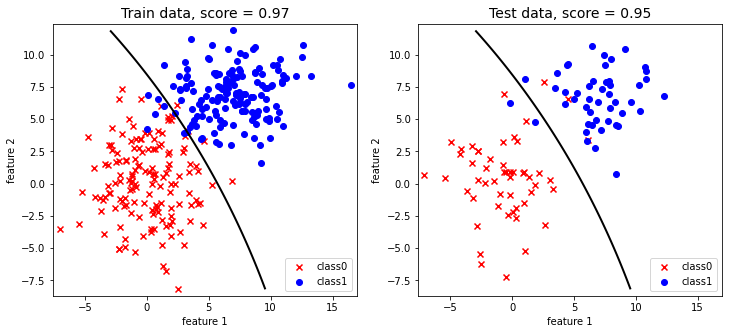

In [20]:
plotdata(gnb_model, X3_train, y3_train, X3_test, y3_test)

## ROC (Receiver Operating Characteristic) Curve

ROC curve is a graphical representation of the performance of a binary classification model across different discrimination thresholds. It plots the True Positive Rate or TPR (sensitivity) against the False Positive Rate or FPR (1 - specificity) for various threshold values.

The values in the confusion matrix are used to calculate TPR and FPR at different threshold values, which are then plotted on the ROC curve.

**Confusion Matrix:**

|                     | Predicted Negative  | Predicted Positive  |
|:----------------    |:--------------------|:--------------------|
| **Actual Negative** | True Negative (TN)  | False Positive (FP) |
| **Actual Positive** | False Negative (FN) | True Positive (TP)  |

Here's a detailed explanation of the components of ROC:

- **True Positive Rate (TPR):**
   - TPR, also known as sensitivity or recall, represents the proportion of actual positive samples (class 1) that are correctly predicted as positive by the model.
   
   - Mathematically, TPR is calculated as:
    $$\small\text{TPR} = \frac{\text{TP}} {\text{TP + FN}}$$

- **False Positive Rate (FPR):**

    - FPR represents the proportion of actual negative samples (class 0) that are incorrectly predicted as positive by the model.
    
    - Mathematically, FPR is calculated as:
    $$\small\text{FPR} = \frac{\text{FP}} {\text{FP + TN}}$$
 
- **Threshold:**

    - The threshold is a value that determines the decision boundary of the classification model. It separates the predicted probabilities into the positive class (above the threshold) and the negative class (below the threshold).
    - By varying the threshold, you can adjust the trade-off between TPR and FPR, influencing the model's classification performance. <br><br>

- **ROC Curve:**

    - The ROC curve is a plot of TPR against FPR for different threshold values.
    - Each point on the ROC curve represents the TPR and FPR at a specific threshold.
    - A diagonal line from the bottom-left corner to the top-right corner represents random guessing (no discrimination), where TPR equals FPR.
    - The further away the ROC curve is from the diagonal line towards the top-left corner, the better the model's performance. <br><br>

- **Area Under the Curve (AUC):**

    - AUC quantifies the overall performance of the classification model by calculating the area under the ROC curve.
    - AUC ranges from 0 to 1, where a higher value indicates better discrimination ability.
    - An AUC of 0.5 suggests that the model performs no better than random guessing, while an AUC of 1 indicates perfect discrimination.

### Model comparison using ROC

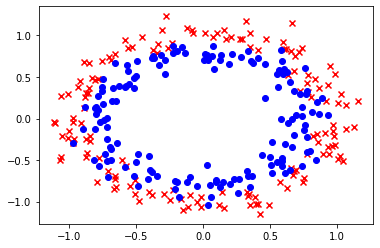

In [21]:
# let's generate a sample dataset using make_circles method in sklearn
X, y = make_circles(n_samples=300, noise=.1)

plt.scatter(X[y == 0, 0], X[y == 0, 1], color='r', marker='x', label='class0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='b', marker='o', label='class1')
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [23]:
# train the classifiers
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)
qda_model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
gnb_model = GaussianNB().fit(X_train, y_train)

# calculate the scores
lda_score = lda_model.score(X_test, y_test)
qda_score = qda_model.score(X_test, y_test)
gnb_score = gnb_model.score(X_test, y_test)

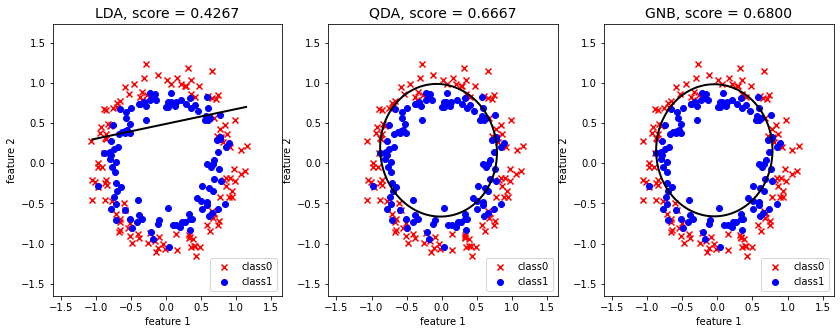

In [24]:
# plot the datapoins and decision boundries of different methods
minX1, minX2 = np.min(X[:,0]), np.min(X[:,1])
maxX1, maxX2 = np.max(X[:,0]), np.max(X[:,1])

plt.figure(figsize=(14, 5))

plt.subplot(1,3,1)
plotDB(X_train, lda_model)
plotData(X_train, y_train)
plt.title('LDA, score = %.4f' %lda_score, fontsize=14)
plt.xlim(minX1-.5, maxX1+.5)
plt.ylim(minX2-.5, maxX2+.5)

plt.subplot(1,3,2)
plotDB(X_train, qda_model)
plotData(X_train, y_train)
plt.title('QDA, score = %.4f' %qda_score, fontsize=14)
plt.xlim(minX1-.5, maxX1+.5)
plt.ylim(minX2-.5, maxX2+.5)

plt.subplot(1,3,3)
plotDB(X_train, gnb_model)
plotData(X_train, y_train)
plt.title('GNB, score = %.4f' %gnb_score, fontsize=14)
plt.xlim(minX1-.5, maxX1+.5)
plt.ylim(minX2-.5, maxX2+.5)

plt.show()

The `roc_curve` function takes the true binary labels and the predicted probabilities of the positive class as input and returns the False Positive Rate (FPR), True Positive Rate (TPR), and the corresponding threshold values.

Here's a breakdown of the parameters and output of the `roc_curve` function:

- Parameters:
    - `y_true`: The true binary labels indicating the ground truth of the samples (0 or 1).
    - `y_score`: The predicted probabilities of the positive class (class 1) generated by the classifier.
- Output:
   -  `fpr`: An array containing the False Positive Rates corresponding to different threshold values.
   - `tpr`: An array containing the True Positive Rates corresponding to different threshold values.
   - `thresholds`: An array containing the threshold values used to compute the FPR and TPR.

Threshold values in the context of binary classification refer to the decision boundary used by the classifier to determine the predicted class labels. When making predictions, the classifier calculates the probability of the positive class (class 1) for each sample, and then compares this probability to a threshold value. If the probability is above the threshold, the sample is classified as positive; otherwise, it is classified as negative (class 0).

In a binary classification problem, by adjusting the threshold value, you can control the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR).

- If you increase the threshold value, you will classify fewer samples as positive, leading to a lower TPR but also a lower FPR.
- If you decrease the threshold value, you will classify more samples as positive, increasing the TPR but also increasing the FPR.

In ROC curve analysis, different threshold values are used to compute the True Positive Rate (TPR) and False Positive Rate (FPR) at various operating points. The ROC curve plots the TPR against the FPR for different threshold values, providing a visualization of the classifier's performance across different decision boundaries.

Threshold values are typically chosen based on the specific requirements of the application. For example,
- A credit card company might particularly wish to avoid incorrectly classifying an individual who will default (FN), whereas incorrectly classifying an individual who will not default (TP). Since they concerned about incorrectly predicting the default status for individuals who default, they need to lower the threshold to classify more samples as positive.
- In a medical diagnosis task, you might want to adjust the threshold value to prioritize either sensitivity (TPR) or specificity (1 - FPR) depending on the consequences of false positives and false negatives.



In [25]:
# generate predictions on the test data
lda_pred = lda_model.predict_proba(X_test)[:, 1]
qda_pred = qda_model.predict_proba(X_test)[:, 1]
gnb_pred = gnb_model.predict_proba(X_test)[:, 1]

# Compute ROC curves
lda_fpr, lda_tpr, _1 = roc_curve(y_test, lda_pred)
qda_fpr, qda_tpr, _2 = roc_curve(y_test, qda_pred)
gnb_fpr, gnb_tpr, _3 = roc_curve(y_test, gnb_pred)

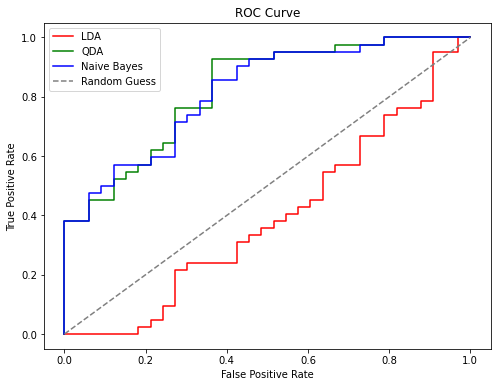

In [26]:
# plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lda_fpr, lda_tpr, color='r', label='LDA')
plt.plot(qda_fpr, qda_tpr, color='g', label='QDA')
plt.plot(gnb_fpr, gnb_tpr, color='b', label='Naive Bayes')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The further the ROC curve is from this line towards the top-left corner, the better the model's performance. As you see in this figure, the LDA model is not better than random guessing and obviously it is not a useful model to use for this dataset becuase it is a linear model.

AUC calculates the area under the ROC curve and quantifies the overall performance of the classification model.

In [27]:
# Calculate AUC
lda_auc = auc(lda_fpr, lda_tpr)
qda_auc = auc(qda_fpr, qda_tpr)
gnb_auc = auc(gnb_fpr, gnb_tpr)

print("LDA AUC:", lda_auc)
print("QDA AUC:", qda_auc)
print("GNB AUC:", gnb_auc)

LDA AUC: 0.39321789321789324
QDA AUC: 0.8232323232323232
GNB AUC: 0.8174603174603173


The QDA and Naive Bayes methods perform similarly, but LDA could not classify the classes correctly as we expected.